In [15]:
import pandas as pd
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
df = pd.read_csv("/home/humanoid/internalHD/datasets/multiclass/nucleai_seg/pannuke_processed/dataframe.csv")

In [20]:
counter = 0
collector = []
for i in range(len(df)):
    if len(eval(df["BBox"].iloc[i])) != len(eval(df["Label"].iloc[i])) or len(eval(df["Label"].iloc[i]))==0:
        collector.append(i)
        counter +=1
print(counter)

343


In [21]:
df = df.drop(collector).reset_index(drop=True)

In [22]:
root_folder = "/home/humanoid/internalHD/datasets/multiclass/nucleai_seg/pannuke_split/train/images/"
train_image_names = os.listdir(root_folder)
train_df = df[df["Image_File"].apply(lambda x: os.path.basename(x) in train_image_names)].reset_index()
if len(train_df) == len(train_image_names):
    print("all files matched")

In [18]:
len(train_df)

5675

In [23]:
root_folder = "/home/humanoid/internalHD/datasets/multiclass/nucleai_seg/pannuke_split/test/images/"
test_image_names = os.listdir(root_folder)
test_df = df[df["Image_File"].apply(lambda x: os.path.basename(x) in test_image_names)].reset_index()
if len(test_df) == len(test_image_names):
    print("all files matched")

In [24]:
root_folder = "/home/humanoid/internalHD/datasets/multiclass/nucleai_seg/pannuke_split/val/images/"
val_image_names = os.listdir(root_folder)
val_df = df[df["Image_File"].apply(lambda x: os.path.basename(x) in val_image_names)].reset_index()
if len(val_df) == len(val_image_names):
    print("all files matched")

In [25]:
save_dir = "/home/humanoid/internalHD/datasets/multiclass/nucleai_seg/pannuke_split/"
train_df.to_csv(f'{save_dir}train_df.csv', index=False)
test_df.to_csv(f'{save_dir}test_df.csv', index=False)
val_df.to_csv(f'{save_dir}val_df.csv', index=False)


In [11]:
print(len(train_df), len(test_df), len(val_df))

5186 1468 591


In [13]:
len(train_df)+len(test_df)+len(val_df)

7245

In [14]:
len(df)

7558

In [112]:
train_image_names[0]

'img_Adrenal_gland_1_01172.png'

/home/humanoid/internalHD/datasets/multiclass/nucleai_seg/pannuke_processed//Cervix/images/img_Cervix_2_01191.png
/home/humanoid/internalHD/datasets/multiclass/nucleai_seg/pannuke_split/train/images/img_Breast_1_00317.png
/home/humanoid/internalHD/datasets/multiclass/nucleai_seg/pannuke_split/train/sem_masks/sem_Breast_1_00317.png
[0 5]
[5]


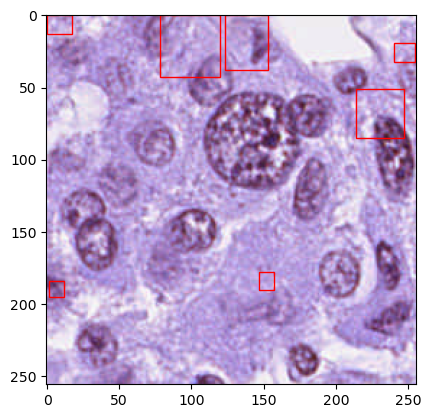

In [24]:
import cv2
import re
idx = np.random.randint(len(train_df))
curr_df = df.iloc[0]
print(train_df.iloc[idx]["Image_File"])

name = curr_df["Image_File"]
pattern = r"pannuke_processed//[^/]+/images/"
name = re.sub(pattern, f"pannuke_split/train/images/", name)
print(name)


image_path = name

name = curr_df["Sem_Mask_File"]
pattern = r"pannuke_processed//[^/]+/sem_masks/"
name = re.sub(pattern, f"pannuke_split/train/sem_masks/", name)
print(name)

mask_path = name
bbox = eval(curr_df["BBox"])
classes = eval(curr_df["Label"])
image = cv2.imread(image_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
fig, axs = plt.subplots(1, 1)
print(np.unique(mask))
print(np.unique(classes))
axs.imshow(image)
for box, labels in zip(bbox, classes):
    x_min, y_min, x_max, y_max = box
    x, y, w, h = box
    #label_str = ', '.join([str(l) for l in labels])
    axs.add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=False, color='red'))
    #cv2.putText(raw_image, label_str, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
#image_rgb = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)
plt.show()

In [28]:
[im for im in train_image_names if ".png" not in im]

[]

In [113]:
df.columns

Index(['Image_File', 'Inst_Mask_File', 'Sem_Mask_File', 'BBox', 'Label',
       'Fold'],
      dtype='object')

In [84]:
grouped_df = train_df.groupby(["Image_File"]).agg({
    "BBox":list,
    "Label":list,
    "Fold":list,
}).reset_index()

In [85]:
combined_df = pd.DataFrame({
    "Image_File": grouped_df["Image_File"],
    "BBox": grouped_df["BBox"],
    "Label": grouped_df["Label"],
    "Fold": grouped_df["Fold"]
})

In [110]:
train_df.iloc[0]

Image_File        /home/humanoid/internalHD/datasets/multiclass/...
Inst_Mask_File    /home/humanoid/internalHD/datasets/multiclass/...
Sem_Mask_File     /home/humanoid/internalHD/datasets/multiclass/...
BBox              [(123, 0, 153, 38), (78, 0, 120, 43), (240, 19...
Label                                         [5, 5, 5, 5, 5, 5, 5]
Fold                                                         Fold 1
Name: 0, dtype: object

In [108]:
len(train_image_names)

5675

In [90]:
# Group the DataFrame by 'Image_File'

# Replace 'Image_File' and 'BoundingBox' with the actual column names as in your DataFrame
new_df = pd.DataFrame(columns=['Image_File', 'Bbox'])

grouped = train_df.groupby('Image_File')
counter = 0
for image_file, group in grouped:
    image_path = os.path.join("path/to/your/images", image_file)  # Replace with the actual path to your images
    bounding_boxes = group['BBox'].tolist()
    counter+=1
    # Create a row in the new DataFrame with the aggregated bounding boxes for each image
    new_row = {
        'Image_File': image_file,
        'Aggregated_BoundingBox': bounding_boxes
    }
    new_df = new_df.append(new_row, ignore_index=True)


/tmp/ipykernel_6968/556883671.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/tmp/ipykernel_6968/556883671.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/tmp/ipykernel_6968/556883671.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/tmp/ipykernel_6968/556883671.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/tmp/ipykernel_6968/556883671.py:17: FutureWarning: The frame.append method is deprecated and will be remove

In [89]:
len(new_df)

5432

In [91]:
counter

5432